<a href="https://colab.research.google.com/github/KritikaSati/Forecasting-Model/blob/main/ForecastModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing xlrd version 1.2.0 

In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


Importing warnings, packages like: numpy, pandas, matplotlib

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Importing DataSet and Printing it

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_excel('gdrive/My Drive/SuperstoreData.xls')
print(df.head())

Mounted at /content/gdrive
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0    

Data Cleaning and Indexing

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Data Visualization

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


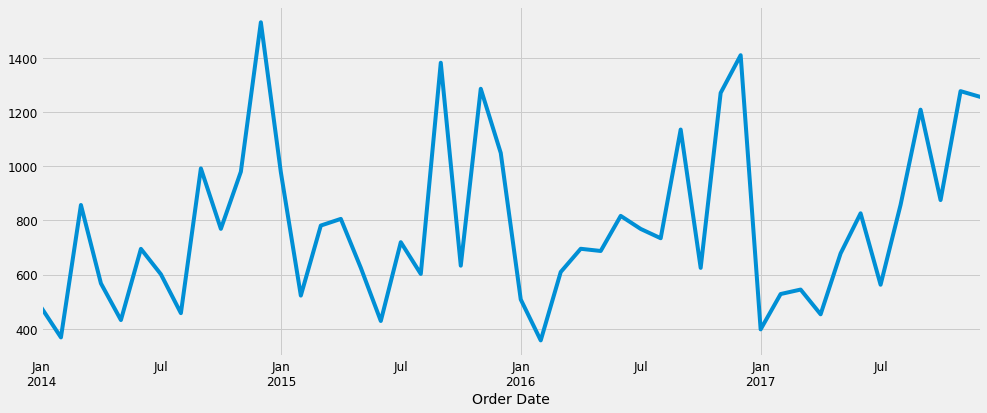

In [ ]:
y = furniture['Sales'].resample('MS').mean()
print(y['2017': ])
y.plot(figsize=(15,6))
plt.show()

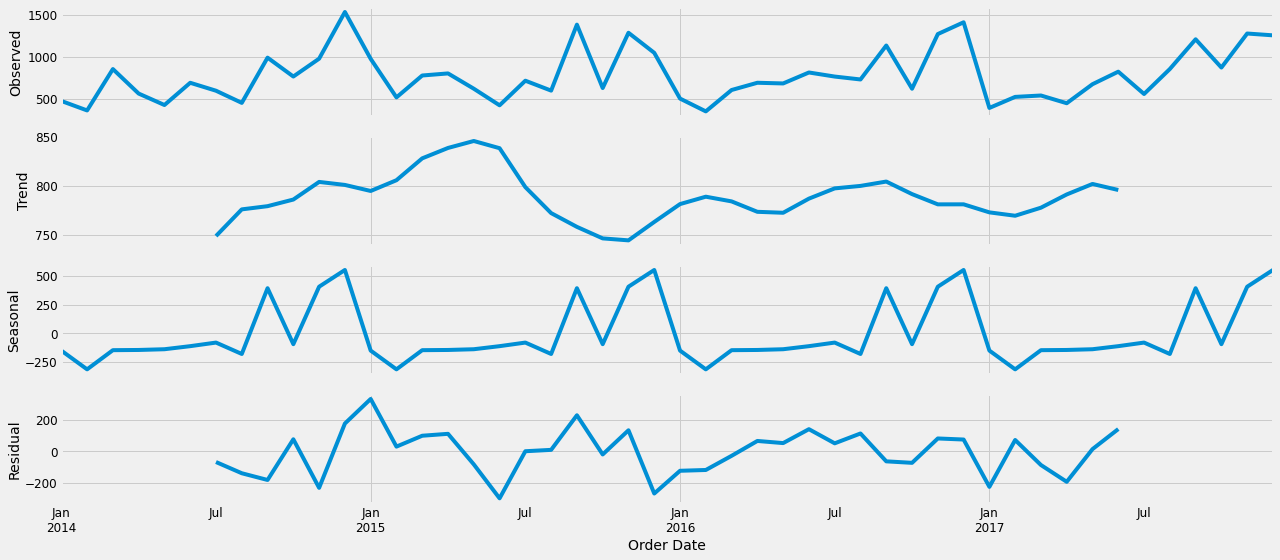

In [ ]:
from pylab import rcParams  #parameters are imported 
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')  #statistical model (sm used)
fig = decomposition.plot()
plt.show()

After observing, we can say that the graph showing us the seasonal ARIMA model since the pattern in the graph is increasing only in a particular time of month

Time Series Forecasting with ARIMA

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Example of parameter combinations for seasonal ARIMA')
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[4]))


Example of parameter combinations for seasonal ARIMA
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


Fitting the ARIMA model and Running model diagonistic to check the unsual behaviour 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1448.0635864531782
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1314.9135794091435
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2931.4459685689417
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809145
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.588499811078


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2578.407685878101
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1363.5571341107245
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269187
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1379.5770594611533
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817331


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2704.9650459821123
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484827687
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774425456
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2560.808670239328
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172687
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1355.136316958002
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352154


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1334.896860563096
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084565
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185481
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82103.26964285906
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958149913
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876879
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2519.493065167048
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002122771
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1345.8589896655533
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281136
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587860555
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1912.1819232761209
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345412
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835189
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2516.1759453415243
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609516


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660858
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395474454
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


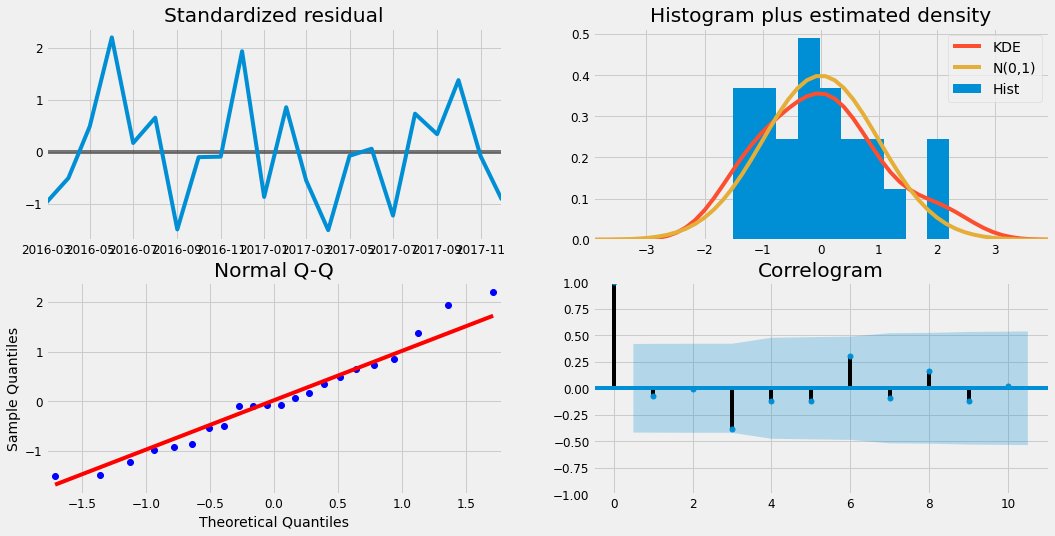

In [ ]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order= param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
    except:
        continue
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (1,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
result = mod.fit()
print(results.summary().tables[1] )
results.plot_diagnostics(figsize=(16,8))
plt.show()

Prediction for the particular value 

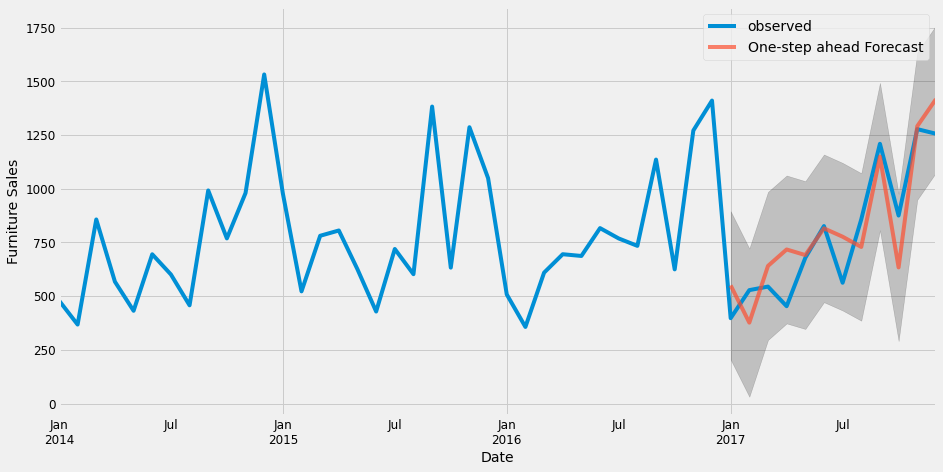

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax= ax, label = 'One-step ahead Forecast', alpha =.7, figsize =(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()